In [86]:
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import *
from matplotlib import pyplot as plt
from matplotlib import rc
from sklearn.cluster import KMeans
from pandas.plotting import scatter_matrix
from sklearn import preprocessing
import pandas as pd
import numpy as np
%matplotlib inline

In [17]:
df = pd.read_csv("binary.csv", header=None, delimiter=';')
df.values

array([['ecoli1', 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1],
       ['ecoli2', 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0],
       ['ecoli3', 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1],
       ['styphi1', 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       ['styphi2', 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       ['styphi3', 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       ['kpneu1', 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1],
       ['kpneu2', 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1],
       ['kpneu3', 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1],
       ['kpneu4', 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1],
       ['kpneu5', 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1],
       ['pvul1', 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       ['pvul2', 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       ['pvul3', 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       ['pmor1', 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 

In [18]:
df = df.drop(0, axis=1) # убираю из данных столбец с названиями объектов, тк он имеет не числовой тип
df

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0,1,1,1,0,0,0,1,0,0,0,0,0,0,1,1
1,0,1,0,1,1,0,0,1,0,0,0,0,0,0,1,0
2,1,1,0,1,1,0,0,1,0,0,0,0,0,0,1,1
3,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
5,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0
6,0,1,1,1,0,1,1,1,1,1,0,0,0,1,1,1
7,0,1,1,1,0,1,1,1,1,1,0,0,1,0,1,1
8,0,1,1,1,0,1,1,1,1,1,0,0,1,1,1,1
9,0,1,1,1,0,1,1,1,0,1,0,0,1,1,1,1


In [23]:
# отбираю признаки, по которым будет проводиться кластеризация
col = [2, 4, 10]

In [144]:
# стандартизировать переменные не нужно, так как они были нормированы изначально
# в данном случае я привожу их к типу float для корректной работы алгоритмов
dataNorm = np.array(df[col], dtype=float)
dataNorm
# df[col].values

array([[1., 1., 0.],
       [1., 1., 0.],
       [1., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [150]:
# вычисляю расстояния между объектами
data_distance = pdist(dataNorm, 'euclidean')
data_distance

array([0.        , 0.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 0.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       0.        , 0.        , 1.41421356, 1.41421356, 1.41421356,
       1.41421356, 1.41421356, 1.41421356, 1.41421356, 1.41421356,
       1.41421356, 1.41421356, 0.        , 0.        , 1.41421356,
       1.41421356, 1.41421356, 1.41421356, 1.41421356, 1.41421356,
       1.41421356, 1.41421356, 1.41421356, 1.41421356, 0.        ,
       1.41421356, 1.41421356, 1.41421356, 1.41421356, 1.41421

In [145]:
# иерархическая кластеризация
data_linkage = linkage(data_distance, method='average')

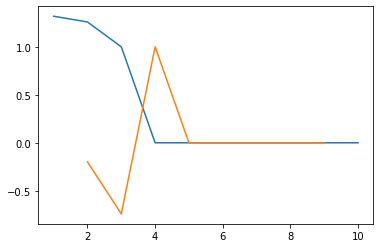

4


In [146]:
# "каменистая осыпь"
last = data_linkage[-10:, 2]
last_rev = last[::-1]
idxs = np.arange(1, len(last) + 1)
plt.plot(idxs, last_rev)

acceleration = np.diff(last, 2)
acceleration_rev = acceleration[::-1]
plt.plot(idxs[:-2] + 1, acceleration_rev)
plt.show()
k = acceleration_rev.argmax() + 2
print(k) # прогнозируемое количество кластеров

In [151]:
# функция построения дендрограммы
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)
    
    ddata = dendrogram(*args, **kwargs)
    
    if not kwargs.get('no_plot', False):
        plt.title('Hierarchial Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                            textcoords='offset points',
                            va='top', ha='center')
            if max_d:
                plt.axhline(y=max_d, c='k')
        return ddata

In [152]:
# задаю количество кластеров
# 4 - оптимальное количество, определенное в ходе подставлений различных значений
# при n_clust > 4 - расстояния между кластерами становятся достаточно малыми
n_clust = 4

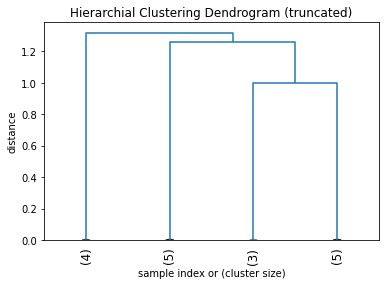

In [149]:
fancy_dendrogram(
    data_linkage,
    truncate_mode='lastp',
    p=n_clust,
    leaf_rotation=90,
    leaf_font_size=12,
    show_contracted=True,
    annotate_above=10,
)
plt.show()

In [112]:
# массив принадлежности к кластерам
clusters = fcluster(data_linkage, n_clust, criterion='maxclust')
clusters

array([3, 3, 3, 1, 1, 1, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 1], dtype=int32)

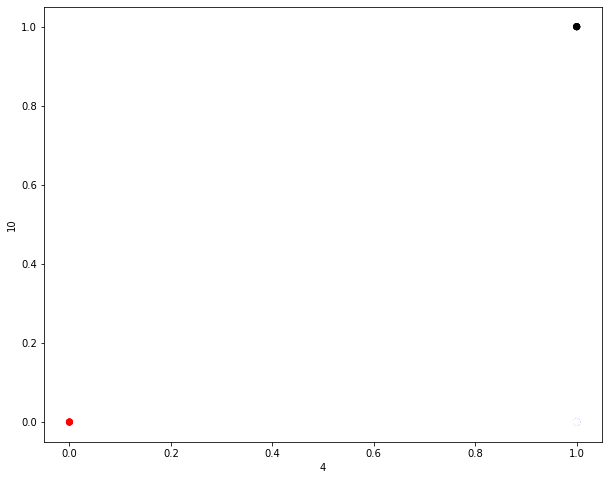

In [118]:
x = 1
y = 2
plt.figure(figsize=(10, 8))
plt.scatter(dataNorm[:, x], dataNorm[:, y], c=clusters, cmap='flag')
plt.xlabel(col[x])
plt.ylabel(col[y])
plt.show()

In [155]:
# группировка объектов по кластерам, под номерами признаков - их средние значения для объектов в кластере
df['I']=clusters
res=df.groupby('I')[col].mean()
res['Количество']=df.groupby('I').size().values
res

,2,4,10,Количество
I,,,,
1,1.0,0.0,0.0,4
2,0.0,1.0,0.0,5
3,1.0,1.0,0.0,3
4,1.0,1.0,1.0,5


In [153]:
# проверка, верно ли определились объекты
df[df['I']==1][col]

,2,4,10
3,1,0,0
4,1,0,0
5,1,0,0
16,1,0,0


In [127]:
# KMeans кластеризация
km = KMeans(n_clusters=n_clust).fit(dataNorm)
km.labels_ + 1

array([1, 1, 1, 4, 4, 4, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4])

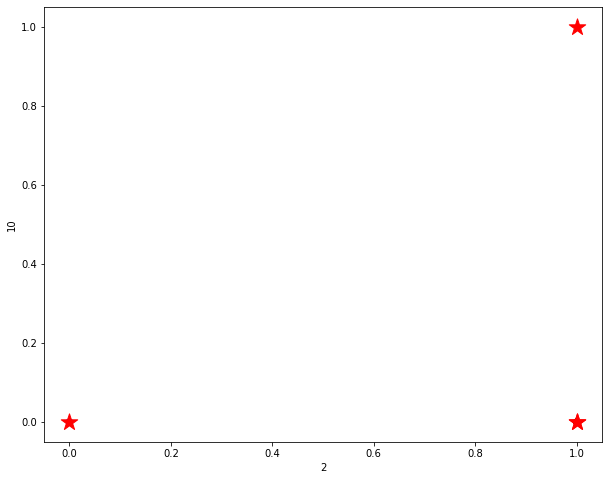

In [128]:
x=0
y=2
centroids = km.cluster_centers_
plt.figure(figsize=(10, 8))
plt.scatter(dataNorm[:,x], dataNorm[:,y], c=km.labels_, cmap='flag')
plt.scatter(centroids[:, x], centroids[:, y], marker='*', s=300,
            c='r', label='centroid')
plt.xlabel(col[x])
plt.ylabel(col[y]);
plt.show()

In [129]:
# группировка объектов по кластерам, под номерами признаков - их средние значения для объектов в кластере
df['KMeans']=km.labels_+1
res=df.groupby('KMeans')[col].mean()
res['Количество']=df.groupby('KMeans').size().values
res

,2,4,10,Количество
KMeans,,,,
1,1.0,1.0,0.0,3
2,1.0,1.0,1.0,5
3,0.0,1.0,0.0,5
4,1.0,0.0,0.0,4


In [156]:
# проверка
df[df['KMeans']==4][col]

,2,4,10
3,1,0,0
4,1,0,0
5,1,0,0
16,1,0,0
